In [4]:
#Limiarização Simples

import cv2
import numpy as np

# Load our image as greyscale 
image = cv2.imread('img/gradient.jpg',0)
cv2.imshow('Original', image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO', thresh4)

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV', thresh5)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np

# Carregar nossa imagem
image = cv2.imread('img/Origin_of_Species.jpg', 0)

cv2.imshow('Original', image)
cv2.waitKey(0) 

ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
cv2.imwrite('../img/limiarizacaoabinariaorigin.jpg', thresh1)
cv2.waitKey(0) 

cv2.destroyAllWindows()

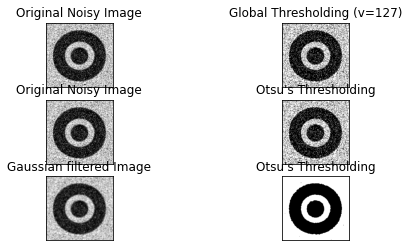

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('img/bimodal_hsv_noise.png', 0)
cv2.imshow('Imagem Original', img)


# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.savefig('img/limiarizacaootsu.jpg')
plt.show()


In [7]:
import numpy as np
import cv2


# Load our new image
image = cv2.imread('img/booksonthetable.jpeg', 0 )

cv2.imshow('Original', image)
cv2.waitKey(0) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", th2) 
cv2.imwrite('img/limiarizacaoadaptativaotsu.jpg', th2)
cv2.waitKey(0) 

cv2.destroyAllWindows()

In [8]:
#Limiarização Adaptativa pela Média
import numpy as np
import cv2
# Carregar nossa imagem
image = cv2.imread('img/booksonthetable.jpeg', 0)
cv2.imshow('Original', image)
cv2.waitKey(0) 
# Filtro de blur para remover o ruido da imagem
image = cv2.GaussianBlur(image, (3, 3), 0)
thresh = cv2.adaptiveThreshold(image, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
cv2.imshow("Adaptive Mean Thresholding", thresh) 
cv2.imwrite('img/limiarizacaoadaptativa.jpg', thresh)
cv2.waitKey(0) 

cv2.destroyAllWindows()